In [30]:
import csv

data = None
prices = []
with open('../historical_data/Binance_BTCUSDT_1h.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    cnt = 1000
    for row in data:
        cnt -= 1
        if cnt == 0:
            break
        if 'BTCUSDT' in row:
            prices.append(float(row[2]))

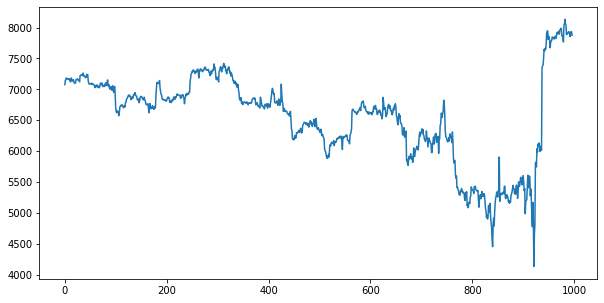

In [48]:
import matplotlib.pyplot as plt

plt.plot(prices)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 15)
plt.show()

In [86]:
from math import sqrt
price_diff = []

for i in range(len(prices) - 1):
    price_diff.append(sqrt(abs(prices[i] - prices[i + 1])))
    
print(price_diff[:10])

rolling_mean = []
for i in range(len(price_diff)):
    sumx = 0.0
    cnt = 0
    for j in range(max(0, i - 10), min(i + 10, len(price_diff))):
        sumx += price_diff[j]
        cnt += 1
    if cnt > 0:
        rolling_mean.append(sumx / cnt)
    
print(rolling_mean[:10])

[8.373171442171753, 1.8973665961008839, 5.8974570791146705, 4.119465984809117, 2.3065125189340963, 0.5291502622126775, 3.5411862419251494, 3.5242020373412295, 4.221374183841053, 2.3515952032609153]
[3.676148154971154, 3.9199230981647712, 4.2100421089831555, 4.097135934458323, 4.292084743879188, 4.103925350665232, 4.071385927088268, 4.018094893628309, 4.12141877753086, 4.169024776042481]


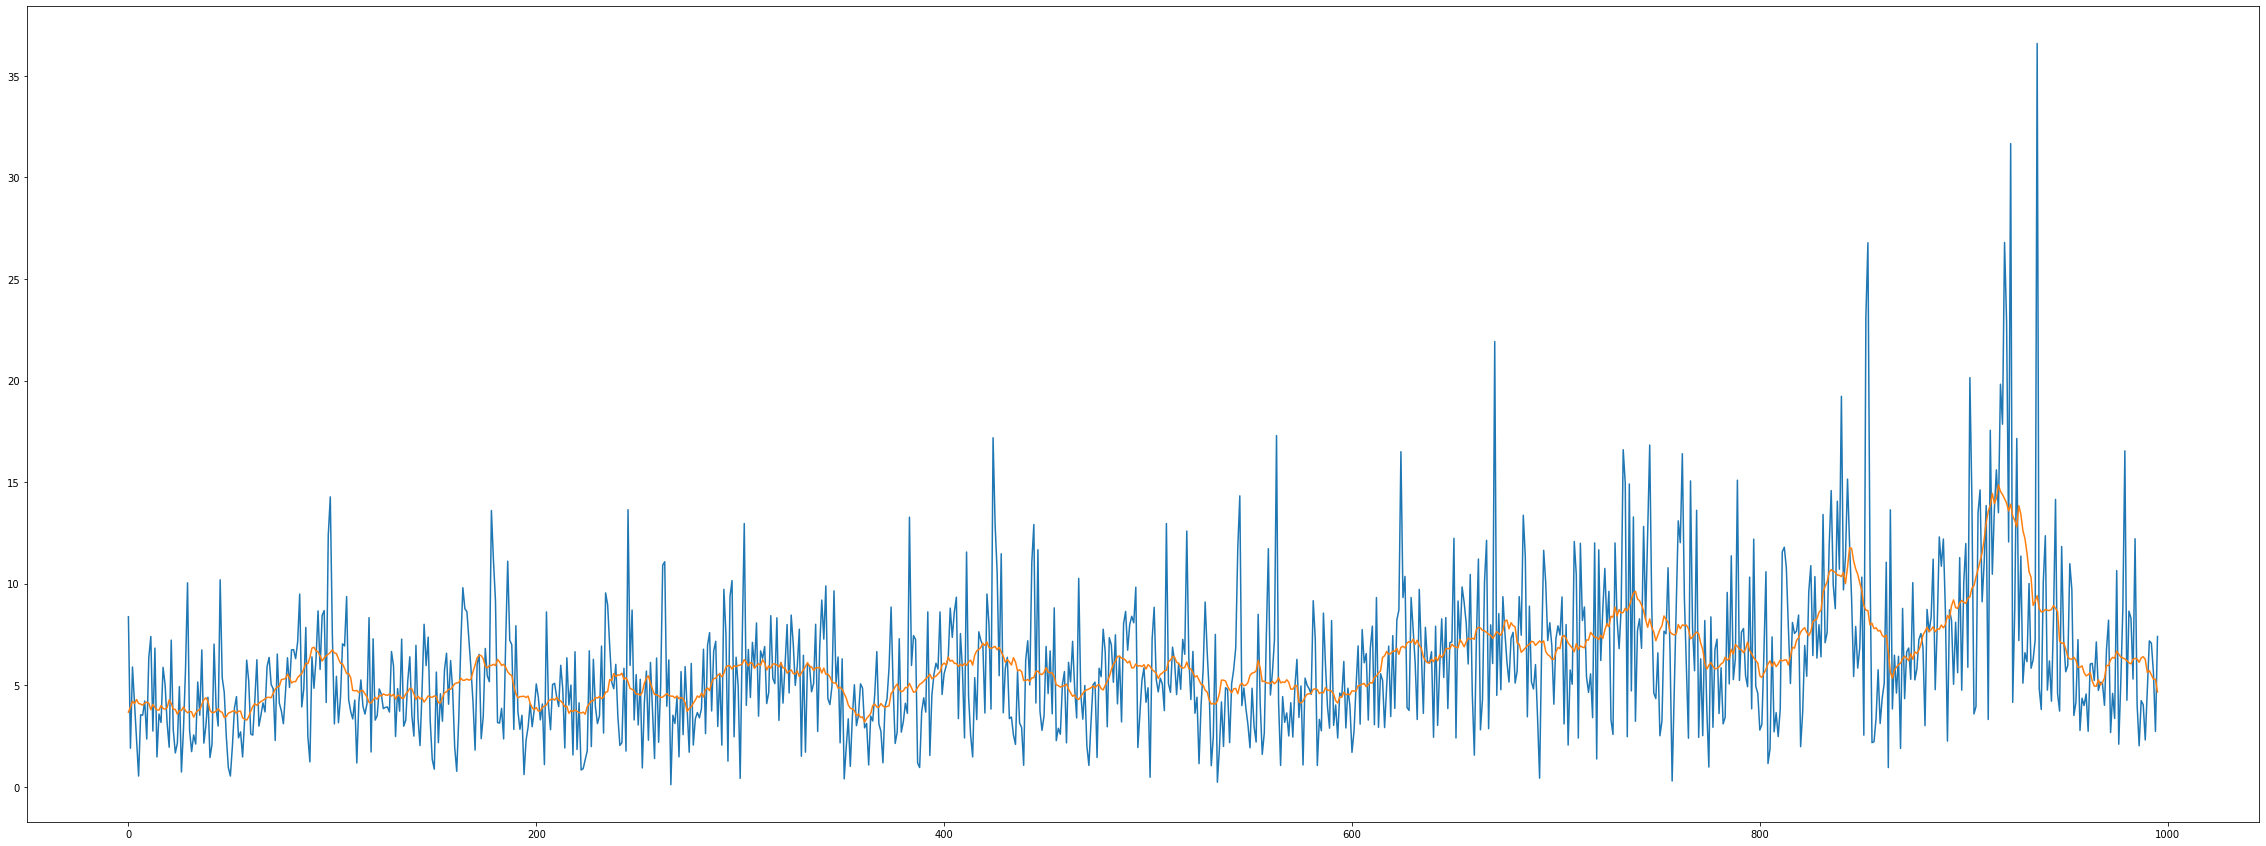

In [89]:
import matplotlib.pyplot as plt

plt.plot(price_diff)
plt.plot(rolling_mean)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 15)
plt.show()

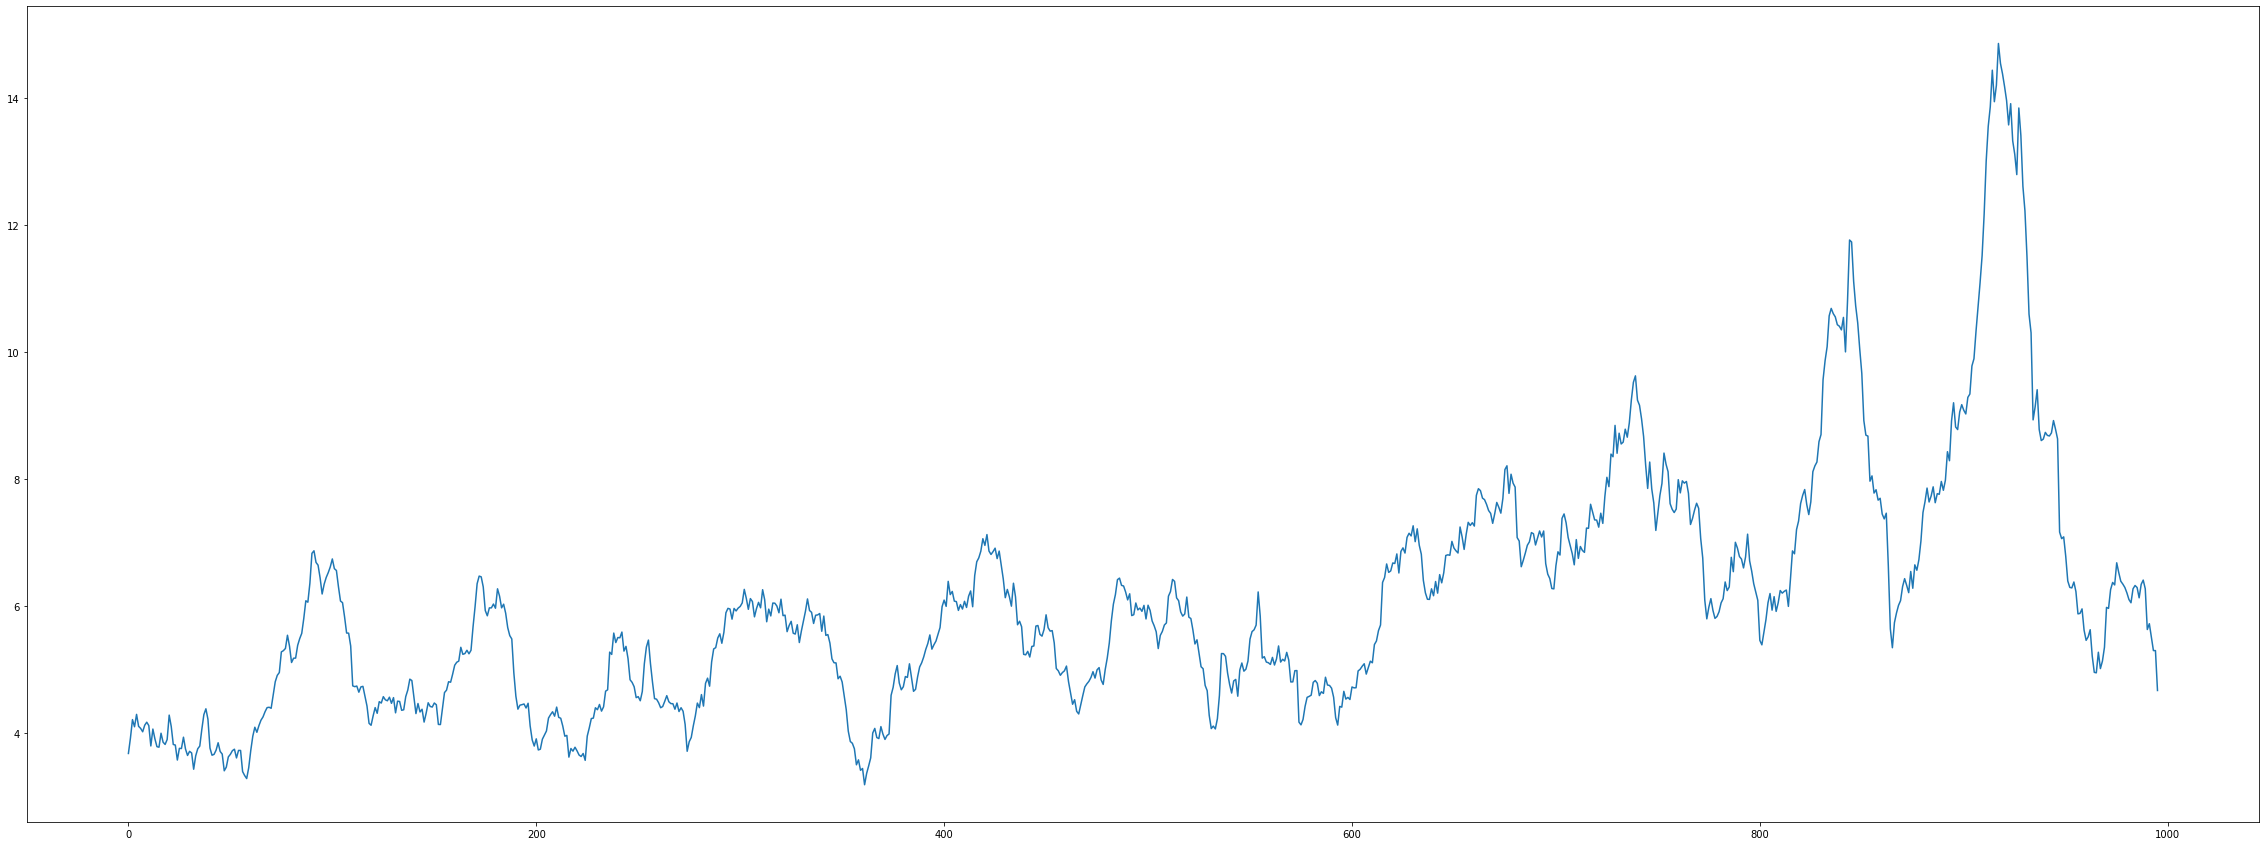

In [90]:
import matplotlib.pyplot as plt

plt.plot(rolling_mean)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 15)
plt.show()

In [141]:
# AR example
from statsmodels.tsa.arima_model import ARMA

def predict_next_load_level(history):
    model = ARMA(history, order=(2, 0, 0))
    model_fit = model.fit(disp=False)
    
    return model_fit.predict(10, 10)[-1]
    
predicted_load = []
for i in range(0, len(rolling_mean[:800]) - 100):
    predicted_load.append(predict_next_load_level(rolling_mean[i:min(len(rolling_mean), i + 100)]))

print(predicted_load)

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[4.185592071469436, 4.115870694294348, 3.7515536772960223, 4.122179390954318, 3.888884294678273, 3.772477548788274, 3.789810265937585, 4.057324898436988, 3.837170600350494, 3.827654062625782, 3.930488542455799, 4.403024839080447, 4.0605592277364675, 3.7532023969407082, 3.8208330182529373, 3.525271822780131, 3.8307365265934115, 3.769594057640267, 3.9979396525685558, 3.7013722939377054, 3.631435997090733, 3.751078965424516, 3.6941064526787857, 3.3661634402192253, 3.7279273788918035, 3.8043788895796062, 3.822827265952575, 4.160715712566898, 4.373967820289546, 4.415060451859191, 4.165193971031314, 3.6192277412960348, 3.622063821238765, 3.6856075770008805, 3.7683663506751715, 3.8982887347226467, 3.683507954888812, 3.6785613000661534, 3.35085219003388, 3.5128259559758557, 3.692997653331133, 3.6926810238240146, 3.7549570996444412, 3.767982164306298, 3.5865476659105506, 3.7766692972520937, 3.7406396776504534, 3.317164309919353, 3.335330526416424, 3.2944141292275253, 3.5249461538328344, 3.81994

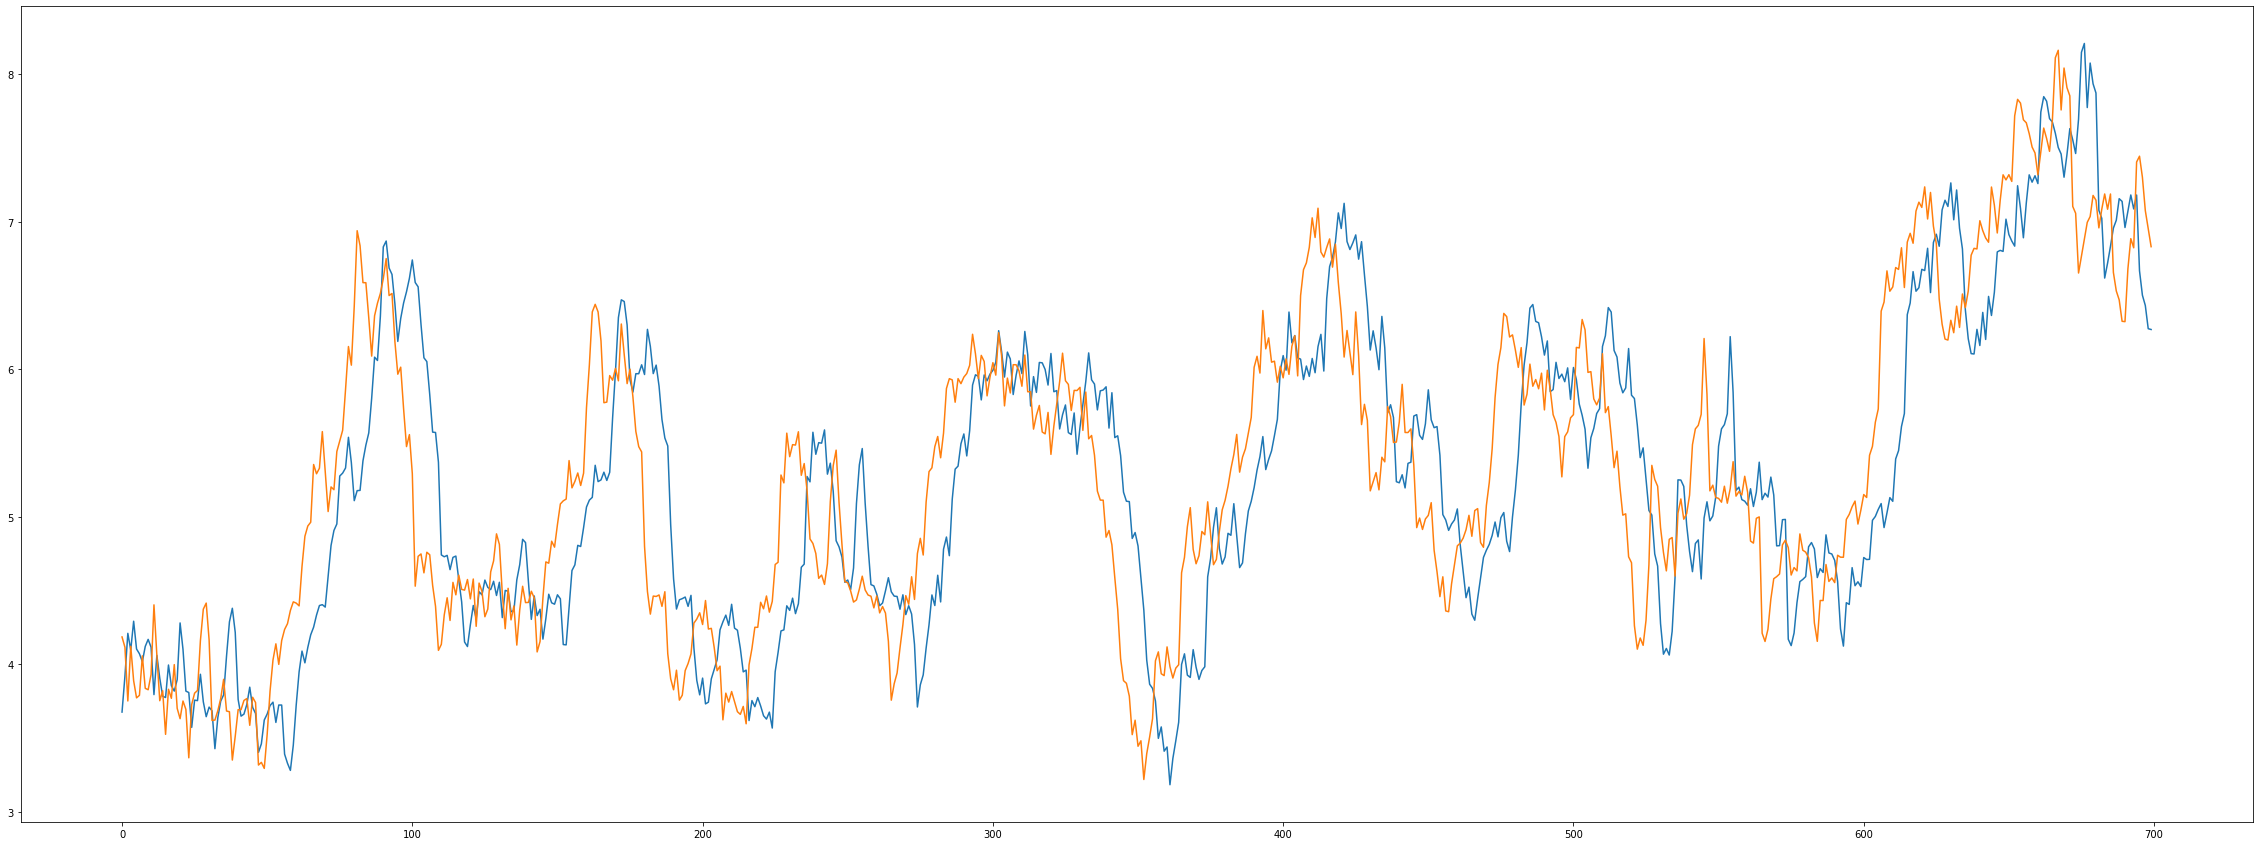

In [143]:
import matplotlib.pyplot as plt

plt.plot(rolling_mean[:700])
plt.plot(predicted_load[:700])
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 15)
plt.show()